# Step 1:

## Importing All Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("mail_data.csv")
df.head(2620)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
2615,ham,"Sir, hope your day is going smoothly. i really..."
2616,ham,2marrow only. Wed at &lt;#&gt; to 2 aha.
2617,ham,I went to ur hon lab but no one is there.
2618,ham,I cant pick the phone right now. Pls send a me...


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data cleaning 

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [9]:
df['Category'] = encoder.fit_transform(df['Category'])

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:

df.duplicated().sum()


415

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5157, 2)

# EDA

In [16]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

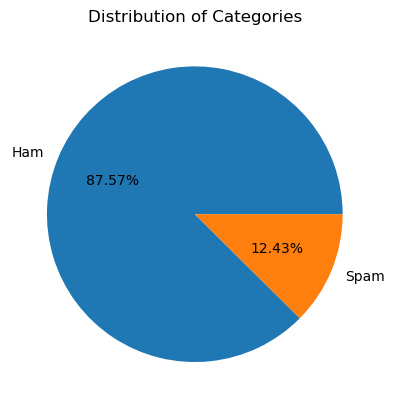

In [18]:
import matplotlib.pyplot as plt

plt.pie(df['Category'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f%%")
plt.title("Distribution of Categories")
plt.show()


In [19]:

# Create a new column for the number of characters
df["No_of_Characters"] = df["Message"].apply(lambda x: len(str(x)))

# Create a new column for the number of words
df["No_of_Words"] = df["Message"].apply(lambda x: len(nltk.word_tokenize(str(x))) if pd.notnull(x) else 0)

# Create a new column for the number of sentences
df["No_of_Sentences"] = df["Message"].apply(lambda x: len(nltk.sent_tokenize(str(x))) if pd.notnull(x) else 0)

In [20]:
df.head()

,Category,Message,No_of_Characters,No_of_Words,No_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df.describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
Category,5157.000000,0.124297,0.329952,0.000000,0.000000,0.000000,0.000000,1.000000
No_of_Characters,5157.000000,79.103936,58.382922,2.000000,36.000000,61.000000,118.000000,910.000000
No_of_Words,5157.000000,18.560403,13.405970,1.000000,9.000000,15.000000,26.000000,220.000000
No_of_Sentences,5157.000000,1.969750,1.455526,1.000000,1.000000,1.000000,2.000000,38.000000


In [22]:
df[df['Category']==0].describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
Category,4516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No_of_Characters,4516.000000,70.869353,56.708301,2.000000,34.000000,53.000000,91.000000,910.000000
No_of_Words,4516.000000,17.267715,13.588065,1.000000,8.000000,13.000000,22.000000,220.000000
No_of_Sentences,4516.000000,1.827724,1.394338,1.000000,1.000000,1.000000,2.000000,38.000000


In [23]:
df[df['Category']==1].describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
Category,641.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
No_of_Characters,641.000000,137.118565,30.399707,7.000000,130.000000,148.000000,157.000000,223.000000
No_of_Words,641.000000,27.667707,7.103501,2.000000,25.000000,29.000000,32.000000,46.000000
No_of_Sentences,641.000000,2.970359,1.485575,1.000000,2.000000,3.000000,4.000000,9.000000


<Axes: xlabel='No_of_Characters', ylabel='Count'>

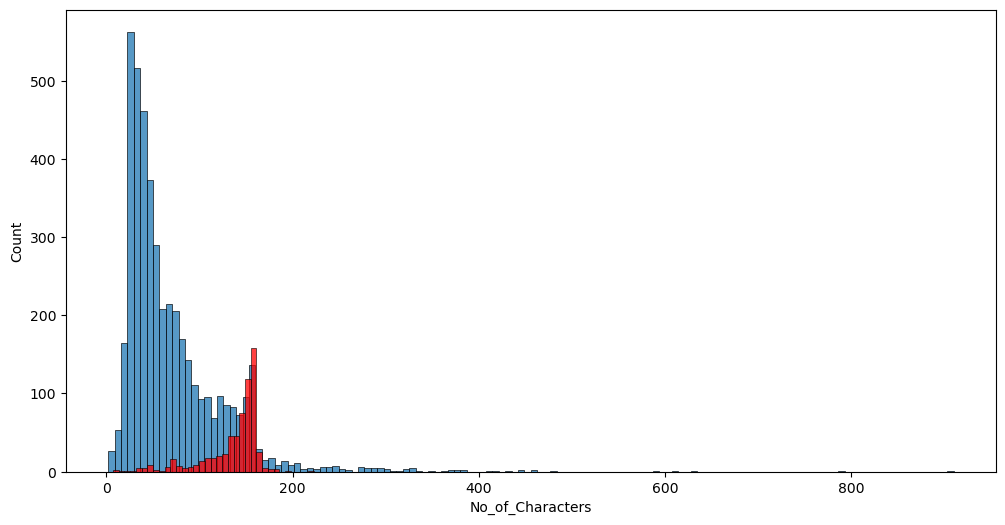

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['No_of_Characters'])
sns.histplot(df[df['Category'] == 1]['No_of_Characters'],color = 'red')

<Axes: xlabel='No_of_Words', ylabel='Count'>

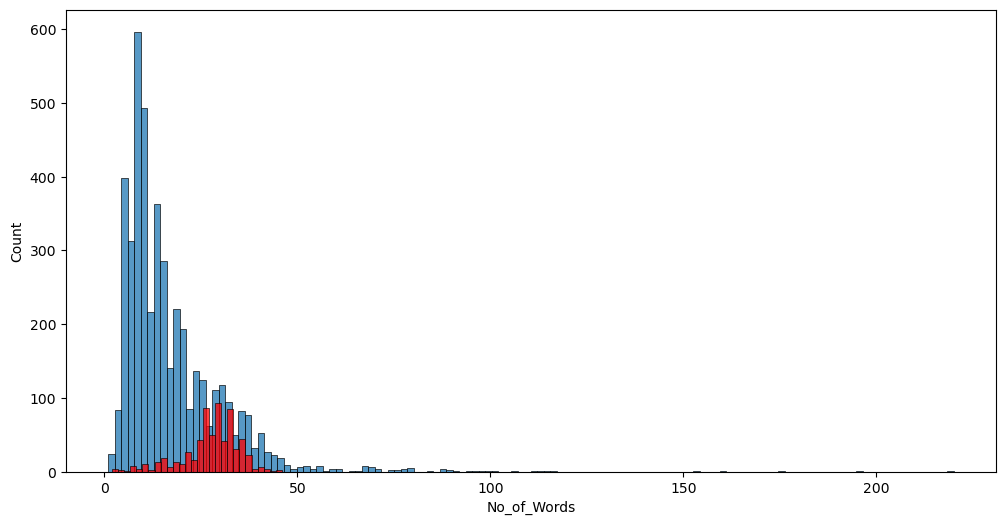

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['No_of_Words'])
sns.histplot(df[df['Category'] == 1]['No_of_Words'],color = 'red')

<Figure size 1200x800 with 0 Axes>

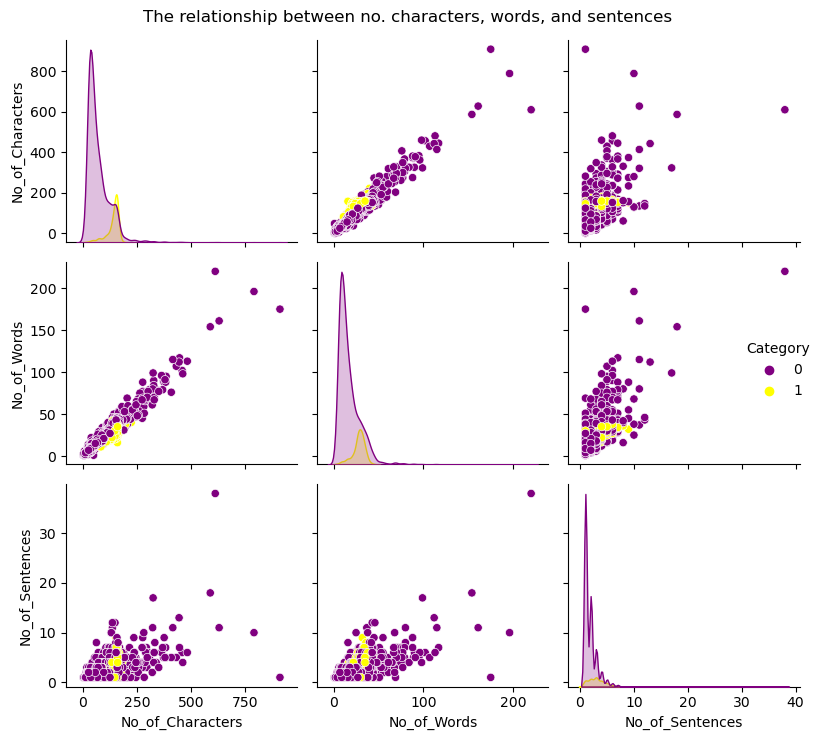

In [26]:
plt.figure(figsize=(12,8))
fig = sns.pairplot(data=df, hue="Category",palette=['purple','yellow'])
plt.suptitle("The relationship between no. characters, words, and sentences")
plt.tight_layout()
plt.show(fig)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_18244\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

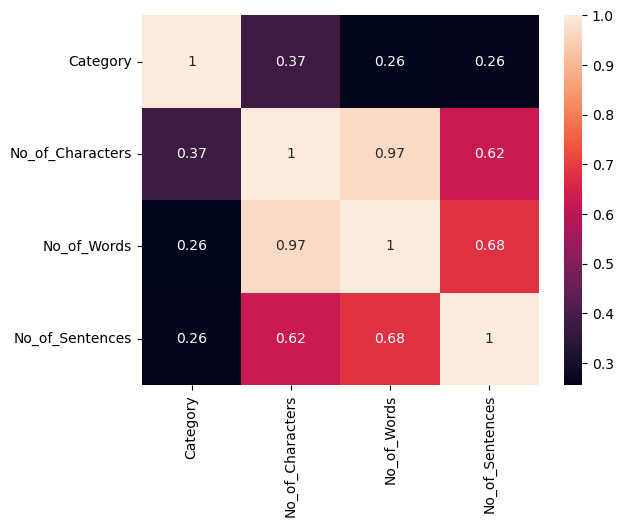

In [27]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # Filtering out non-alphanumeric characters
    text = [i for i in text if i.isalnum()]
    
    # Removing stopwords and punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
    
    # Applying stemming
    text = [ps.stem(i) for i in text]

    return " ".join(text)

# Example usage
original_text = "I'm gonna be home soon, and I don't want to talk about this stuff!"
transformed_text = transform_text(original_text)
print(transformed_text)


gon na home soon want talk stuff


In [29]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [31]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [32]:
df.head()

,Category,Message,No_of_Characters,No_of_Words,No_of_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [98]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 952.6 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 981.9 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.0 MB/s eta 0:00:00


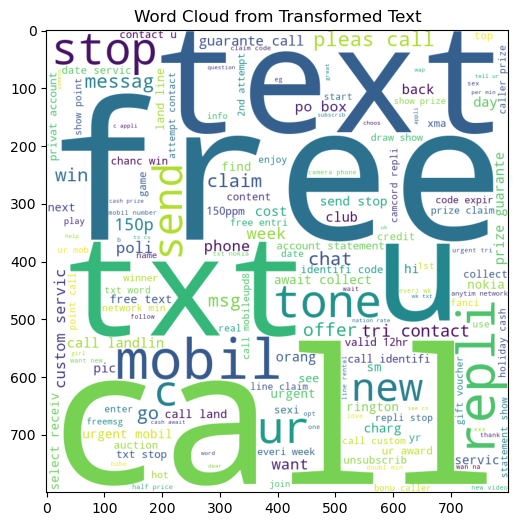

In [33]:
from wordcloud import WordCloud
# Generate the word cloud
wc = WordCloud(width=800, height=800, min_font_size = 10, background_color='white')
spam_wc = wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep = " "))
# Plot the WordCloud image
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.title('Word Cloud from Transformed Text')
plt.show()


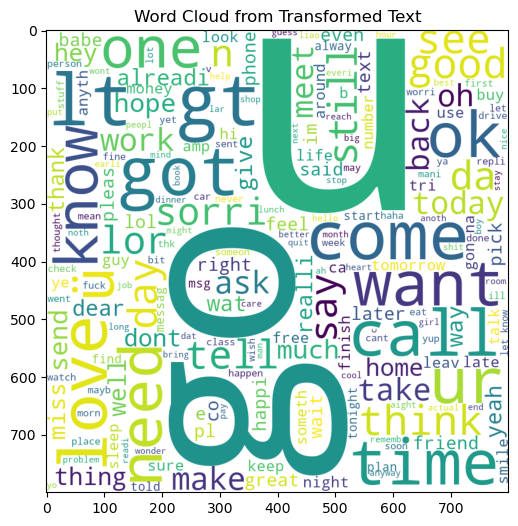

In [34]:
wc = WordCloud(width=800, height=800, min_font_size = 10, background_color='white')
ham_wc = wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep = " "))
# Plot the WordCloud image
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.title('Word Cloud from Transformed Text')
plt.show()


In [35]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [36]:
len(spam_corpus)

9781

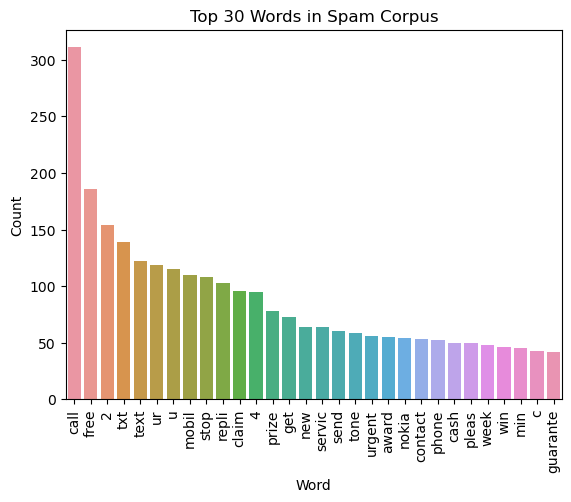

In [37]:
from collections import Counter
import seaborn as sns


# Assuming df is your DataFrame with 'Category' and 'transformed_text' columns
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Creating a DataFrame from the Counter object
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Plotting the bar plot
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in Spam Corpus')
plt.show()


In [38]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [39]:
len(ham_corpus)

35940

In [40]:
print(df_word_counts)


        Word  Count
0       call    311
1       free    186
2          2    154
3        txt    139
4       text    122
5         ur    119
6          u    115
7      mobil    110
8       stop    108
9      repli    103
10     claim     96
11         4     95
12     prize     78
13       get     73
14       new     64
15    servic     64
16      send     60
17      tone     59
18    urgent     56
19     award     55
20     nokia     54
21   contact     53
22     phone     52
23      cash     50
24     pleas     50
25      week     48
26       win     46
27       min     45
28         c     43
29  guarante     42


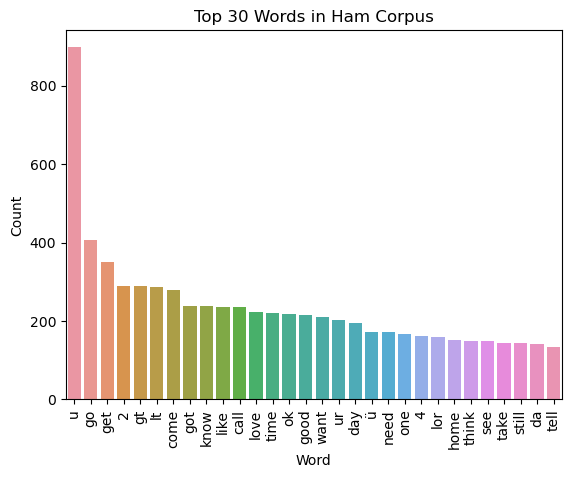

In [41]:
# Creating a DataFrame from the Counter object
word_counts = Counter(ham_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Plotting the bar plot for ham_corpus
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in Ham Corpus')
plt.show()


In [42]:
df.head()

,Category,Message,No_of_Characters,No_of_Words,No_of_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5157, 3000)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'Category' is the target variable
y = df['Category'].values

# Using TfidfVectorizer for feature extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Multinomial Naive Bayes
nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train, y_train)
y_pred_multinomial = nb_multinomial.predict(X_test)

# Model 2: Gaussian Naive Bayes
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train, y_train)
y_pred_gaussian = nb_gaussian.predict(X_test)

# Model 3: Bernoulli Naive Bayes
nb_bernoulli = BernoulliNB()
nb_bernoulli.fit(X_train, y_train)
y_pred_bernoulli = nb_bernoulli.predict(X_test)

# Evaluate the models
models = {
    'Multinomial Naive Bayes': y_pred_multinomial,
    'Gaussian Naive Bayes': y_pred_gaussian,
    'Bernoulli Naive Bayes': y_pred_bernoulli
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)
    print("\n" + "="*40 + "\n")


Model: Multinomial Naive Bayes
Accuracy: 0.98

Confusion Matrix:
[[896   0]
 [ 23 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.83      0.91       136

    accuracy                           0.98      1032
   macro avg       0.99      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032



Model: Gaussian Naive Bayes
Accuracy: 0.88

Confusion Matrix:
[[789 107]
 [ 15 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.89      0.66       136

    accuracy                           0.88      1032
   macro avg       0.76      0.89      0.80      1032
weighted avg       0.92      0.88      0.89      1032



Model: Bernoulli Naive Bayes
Accuracy: 0.99

Confusion Matrix:
[[894   2]
 [ 13 123]]

Classification Report:
           

In [64]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 512.0 kB/s eta 0:03:15
   ---------------------------------------- 0.1/99.8 MB 654.9 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 610.6 kB/s eta 0:02:44
   ---------------------------------------- 0.2/99.8 MB 692.4 kB/s eta 0:02:24
   ---------------------------------------- 0.3/99.8 MB 787.7 kB/s eta 0:02:07
   ---------------------------------------- 0.3/99.8 MB 846.5 kB/s eta 0:01:58
   -----------------------------

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:
# Corrected instances creation
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [54]:

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'Bagging': bc,
    'ExtraTrees': etc,
    'GradientBoosting': gbdt,
    'XGBoost': xgb
}



In [55]:
from sklearn.metrics import accuracy_score, precision_score

# Assuming you have already defined X_train, y_train, X_test, and y_test

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [56]:
# Example using your Support Vector Classifier (SVC)
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)

# Iterating through all classifiers in clfs
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For {name}:")
    print("  Accuracy:", current_accuracy)
    print("  Precision:", current_precision)
    print("="*30)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Optionally, you can print the overall average accuracy and precision
print("Overall Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Overall Average Precision:", sum(precision_scores) / len(precision_scores))


Accuracy: 0.9767441860465116
Precision: 0.9516129032258065
For SVC:
  Accuracy: 0.9767441860465116
  Precision: 0.9516129032258065
For KN:
  Accuracy: 0.9127906976744186
  Precision: 1.0
For NB:
  Accuracy: 0.9777131782945736
  Precision: 1.0
For DecisionTree:
  Accuracy: 0.9408914728682171
  Precision: 0.8440366972477065
For LogisticRegression:
  Accuracy: 0.9515503875968992
  Precision: 0.8909090909090909
For RandomForest:
  Accuracy: 0.9777131782945736
  Precision: 0.9829059829059829
For AdaBoost:
  Accuracy: 0.9583333333333334
  Precision: 0.8780487804878049
For Bagging:
  Accuracy: 0.9641472868217055
  Precision: 0.8613138686131386
For ExtraTrees:
  Accuracy: 0.9796511627906976
  Precision: 0.9831932773109243
For GradientBoosting:
  Accuracy: 0.9544573643410853
  Precision: 0.9405940594059405
For XGBoost:
  Accuracy: 0.9680232558139535
  Precision: 0.912
Overall Average Accuracy: 0.9601832276250881
Overall Average Precision: 0.9313286054642177


In [57]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [58]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.976744,0.951613
1,KN,0.912791,1.000000
2,NB,0.977713,1.000000
3,DecisionTree,0.940891,0.844037
4,LogisticRegression,0.951550,0.890909
5,RandomForest,0.977713,0.982906
6,AdaBoost,0.958333,0.878049
7,Bagging,0.964147,0.861314
8,ExtraTrees,0.979651,0.983193
9,GradientBoosting,0.954457,0.940594


In [59]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [60]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.976744
1,KN,Accuracy,0.912791
2,NB,Accuracy,0.977713
3,DecisionTree,Accuracy,0.940891
4,LogisticRegression,Accuracy,0.951550
5,RandomForest,Accuracy,0.977713
6,AdaBoost,Accuracy,0.958333
7,Bagging,Accuracy,0.964147
8,ExtraTrees,Accuracy,0.979651
9,GradientBoosting,Accuracy,0.954457


<Figure size 1200x600 with 0 Axes>

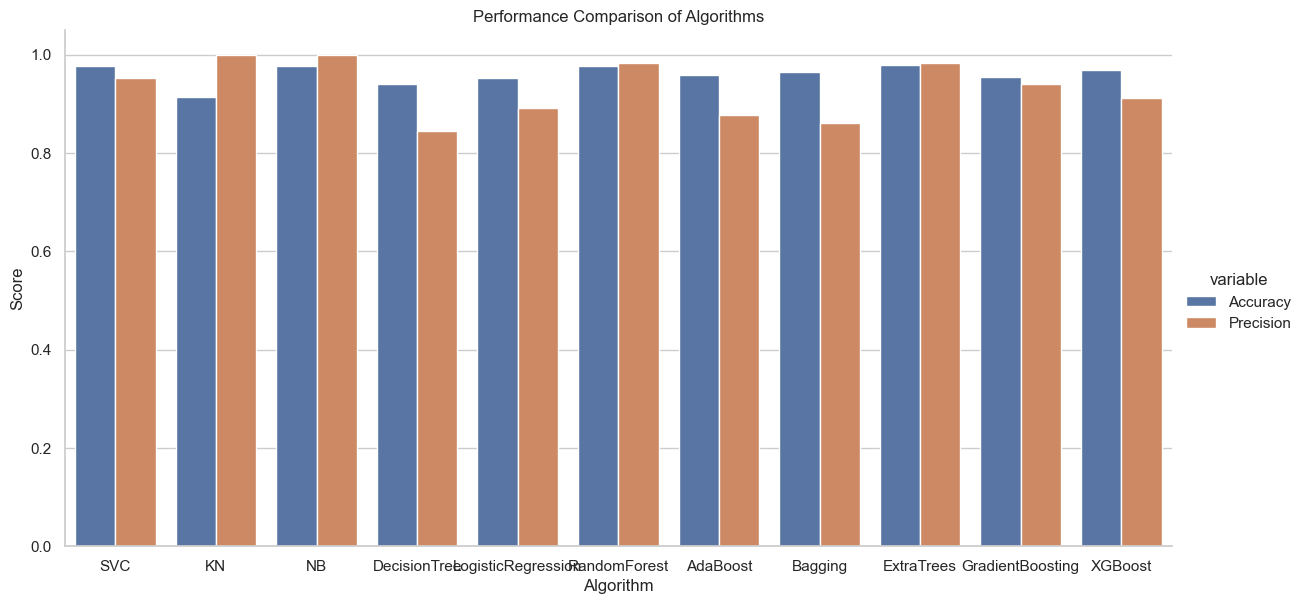

In [61]:
# Assuming you have already defined performance_df1
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creating a catplot
catplot = sns.catplot(x="Algorithm", y="value", hue="variable", data=performance_df1, kind="bar", height=6, aspect=2)

# Adding titles and labels
plt.title('Performance Comparison of Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Score')

# Display the plot
plt.show()


In [62]:
# Create a DataFrame with new features (max features parameter = 5000 and number of characters)
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_5000': accuracy_scores, 'Precision_max_ft_5000': precision_scores})
new_df = performance_df.merge(temp_df, on='Algorithm')

temp_df_num_chars = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_num_chars': accuracy, 'Precision_num_chars': precision})
new_df_scaled = new_df.merge(temp_df_num_chars, on='Algorithm')


In [63]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_5000,Precision_max_ft_5000,Accuracy_num_chars,Precision_num_chars
0,SVC,0.976744,0.951613,0.976744,0.951613,0.976744,0.951613
1,KN,0.912791,1.000000,0.912791,1.000000,0.976744,0.951613
2,NB,0.977713,1.000000,0.977713,1.000000,0.976744,0.951613
3,DecisionTree,0.940891,0.844037,0.940891,0.844037,0.976744,0.951613
4,LogisticRegression,0.951550,0.890909,0.951550,0.890909,0.976744,0.951613
5,RandomForest,0.977713,0.982906,0.977713,0.982906,0.976744,0.951613
6,AdaBoost,0.958333,0.878049,0.958333,0.878049,0.976744,0.951613
7,Bagging,0.964147,0.861314,0.964147,0.861314,0.976744,0.951613
8,ExtraTrees,0.979651,0.983193,0.979651,0.983193,0.976744,0.951613
9,GradientBoosting,0.954457,0.940594,0.954457,0.940594,0.976744,0.951613


In [64]:
from sklearn.ensemble import VotingClassifier

In [65]:
# Define classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create a Voting Classifier with soft voting
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Voting Classifier
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [66]:
# Make predictions on the test set
y_pred_voting = voting.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)

print("Accuracy of the Voting Classifier:", accuracy_voting)
print("Precision of the Voting Classifier:", precision_voting)

Accuracy of the Voting Classifier: 0.9893410852713178
Precision of the Voting Classifier: 0.9921259842519685


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
import pickle


In [68]:
# Define the final meta-classifier
final_estimator = RandomForestClassifier()

# Create a Stacking Classifier
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Stacking Classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the Stacking Classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9883720930232558
Precision: 0.9626865671641791


In [90]:
# Save the TfidfVectorizer using pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [5]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample text data and corresponding labels (replace with your actual data)
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]  # Example labels (0 for negative, 1 for positive)

# Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)


In [93]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/e9/07/63a6e890c9b998a6318b46c2a34377fd1a3e01a94c427d82bfb2472b7c16/streamlit-1.30.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for validators<1,>=0.2 from https://files.pythonhosted.org/packages/3a/0c/785d317eea99c3739821718f118c70537639aa43f96bfa1d83a71f68eaf6/validators-0.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/45/c6/a637a7a11d4619957cb95ca195168759a4502991b1b91c13d3203ffc3748/GitPython-3.1.41-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/4.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.8 MB 1.3 MB/s eta 0:00:

In [6]:
import streamlit as st
import pickle

# Load the saved vectorizer and naive model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

# Streamlit code
st.title("Email Spam Classifier")
input_sms = st.text_area("Enter message")

if st.button('Predict'):
    # Preprocess
    transformed_sms = transform_text(input_sms)  # You need to define the transform_text function

    # Vectorize
    vector_input = tfidf.transform([transformed_sms])

    # Predict
    result = model.predict(vector_input)[0]

    # Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")


2024-09-16 14:41:11.058 
  command:

    streamlit run C:\Users\Aditya\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [7]:
streamlit SMS Classifier.py


SyntaxError: invalid syntax (2443681170.py, line 1)